In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 0. Carga de datos
Previamente se guardó el archivo "E-Commerce_train.xlsx" en formato csv

In [40]:
data_test = pd.read_csv('E-Commerce_test.csv',sep=';', encoding='UTF-8')

In [5]:
data = pd.read_csv('E-Commerce_train.csv',sep=';', encoding='UTF-8')
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8994,8995,D,Ship,3,1,217,3,low,F,1,4177,1
8995,8996,F,Ship,5,3,232,3,medium,M,3,4526,0
8996,8997,A,Ship,4,5,260,3,medium,F,6,4221,0
8997,8998,B,Ship,4,2,184,3,medium,F,5,5931,1


# 1.1. Verificación de duplicados

In [6]:
data[data.duplicated()] # Sin duplicados

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N


# 1.2. Verificación de valores nulos

In [7]:
print('Porcentaje de nulos; ',(data.isnull().sum()/len(data)) * 100)

Porcentaje de nulos;  ID                     0.0
Warehouse_block        0.0
Mode_of_Shipment       0.0
Customer_care_calls    0.0
Customer_rating        0.0
Cost_of_the_Product    0.0
Prior_purchases        0.0
Product_importance     0.0
Gender                 0.0
Discount_offered       0.0
Weight_in_gms          0.0
Reached.on.Time_Y.N    0.0
dtype: float64


# 2. Identificación valores atípicos

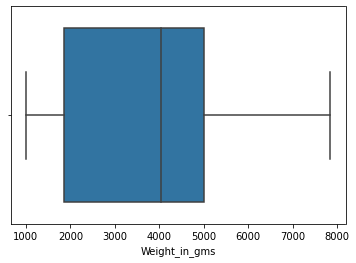

In [8]:
sns.boxplot(x = 'Weight_in_gms', data = data)
plt.show()

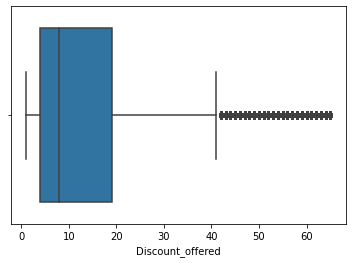

In [9]:
sns.boxplot(x = 'Discount_offered', data = data)
plt.show()

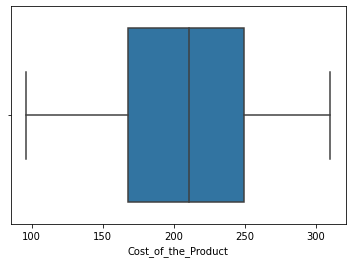

In [10]:
sns.boxplot(x = 'Cost_of_the_Product', data = data)
plt.show()

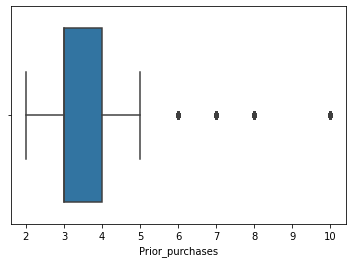

In [11]:
sns.boxplot(x = 'Prior_purchases', data = data)
plt.show()

Si bien las boxplots muestran algunos outliers para las columnas con valores cuantitativos, al analizarlos se nota que son valores posibles para estas variables, por ejemplo para la columna "Discount_offered" se muestran valores cercanos a 70, unas muy buenas ofertas, pero al fin y al cabo, posibles.

# 3. Escalado/Normalización

In [12]:
# *********************************

# 4. Codificación de variables categóricas

Variables ordinales:
- Warehouse_block
- Mode_of_Shipment
- Product_importance
- Gender

In [13]:
from sklearn import preprocessing

In [14]:
#Warehouse_block
le = preprocessing.LabelEncoder()
le.fit(data['Warehouse_block'])
data_mod = data
data_mod['Warehouse_block'] = pd.DataFrame(le.transform(data['Warehouse_block'],),columns=['Warehouse_block'])
data_mod.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,Flight,4,2,177,3,low,F,44,1233,1
1,2,4,Flight,4,5,216,2,low,M,59,3088,1
2,3,0,Flight,2,2,183,4,low,M,48,3374,1
3,4,1,Flight,3,3,176,4,medium,M,10,1177,1
4,5,2,Flight,2,2,184,3,medium,F,46,2484,1


In [15]:
# Mode_of_Shipment
le = preprocessing.LabelEncoder()
le.fit(data_mod['Mode_of_Shipment'])
data_mod['Mode_of_Shipment'] = pd.DataFrame(le.transform(data['Mode_of_Shipment'],),columns=['Mode_of_Shipment'])
data_mod.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,0,4,2,177,3,low,F,44,1233,1
1,2,4,0,4,5,216,2,low,M,59,3088,1
2,3,0,0,2,2,183,4,low,M,48,3374,1
3,4,1,0,3,3,176,4,medium,M,10,1177,1
4,5,2,0,2,2,184,3,medium,F,46,2484,1


In [16]:
# Product_importance
le = preprocessing.LabelEncoder()
le.fit(data_mod['Product_importance'])
data_mod['Product_importance'] = pd.DataFrame(le.transform(data['Product_importance'],),columns=['Product_importance'])
data_mod.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,0,4,2,177,3,1,F,44,1233,1
1,2,4,0,4,5,216,2,1,M,59,3088,1
2,3,0,0,2,2,183,4,1,M,48,3374,1
3,4,1,0,3,3,176,4,2,M,10,1177,1
4,5,2,0,2,2,184,3,2,F,46,2484,1


In [17]:
# Gender
le = preprocessing.LabelEncoder()
le.fit(data_mod['Gender'])
data_mod['Gender'] = pd.DataFrame(le.transform(data['Gender'],),columns=['Gender'])
data_mod.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,0,4,2,177,3,1,0,44,1233,1
1,2,4,0,4,5,216,2,1,1,59,3088,1
2,3,0,0,2,2,183,4,1,1,48,3374,1
3,4,1,0,3,3,176,4,2,1,10,1177,1
4,5,2,0,2,2,184,3,2,0,46,2484,1


In [23]:
data_mod=data_mod.drop(columns='ID')
data_mod.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,3,0,4,2,177,3,1,0,44,1233,1
1,4,0,4,5,216,2,1,1,59,3088,1
2,0,0,2,2,183,4,1,1,48,3374,1
3,1,0,3,3,176,4,2,1,10,1177,1
4,2,0,2,2,184,3,2,0,46,2484,1


# EDA: Pairplot

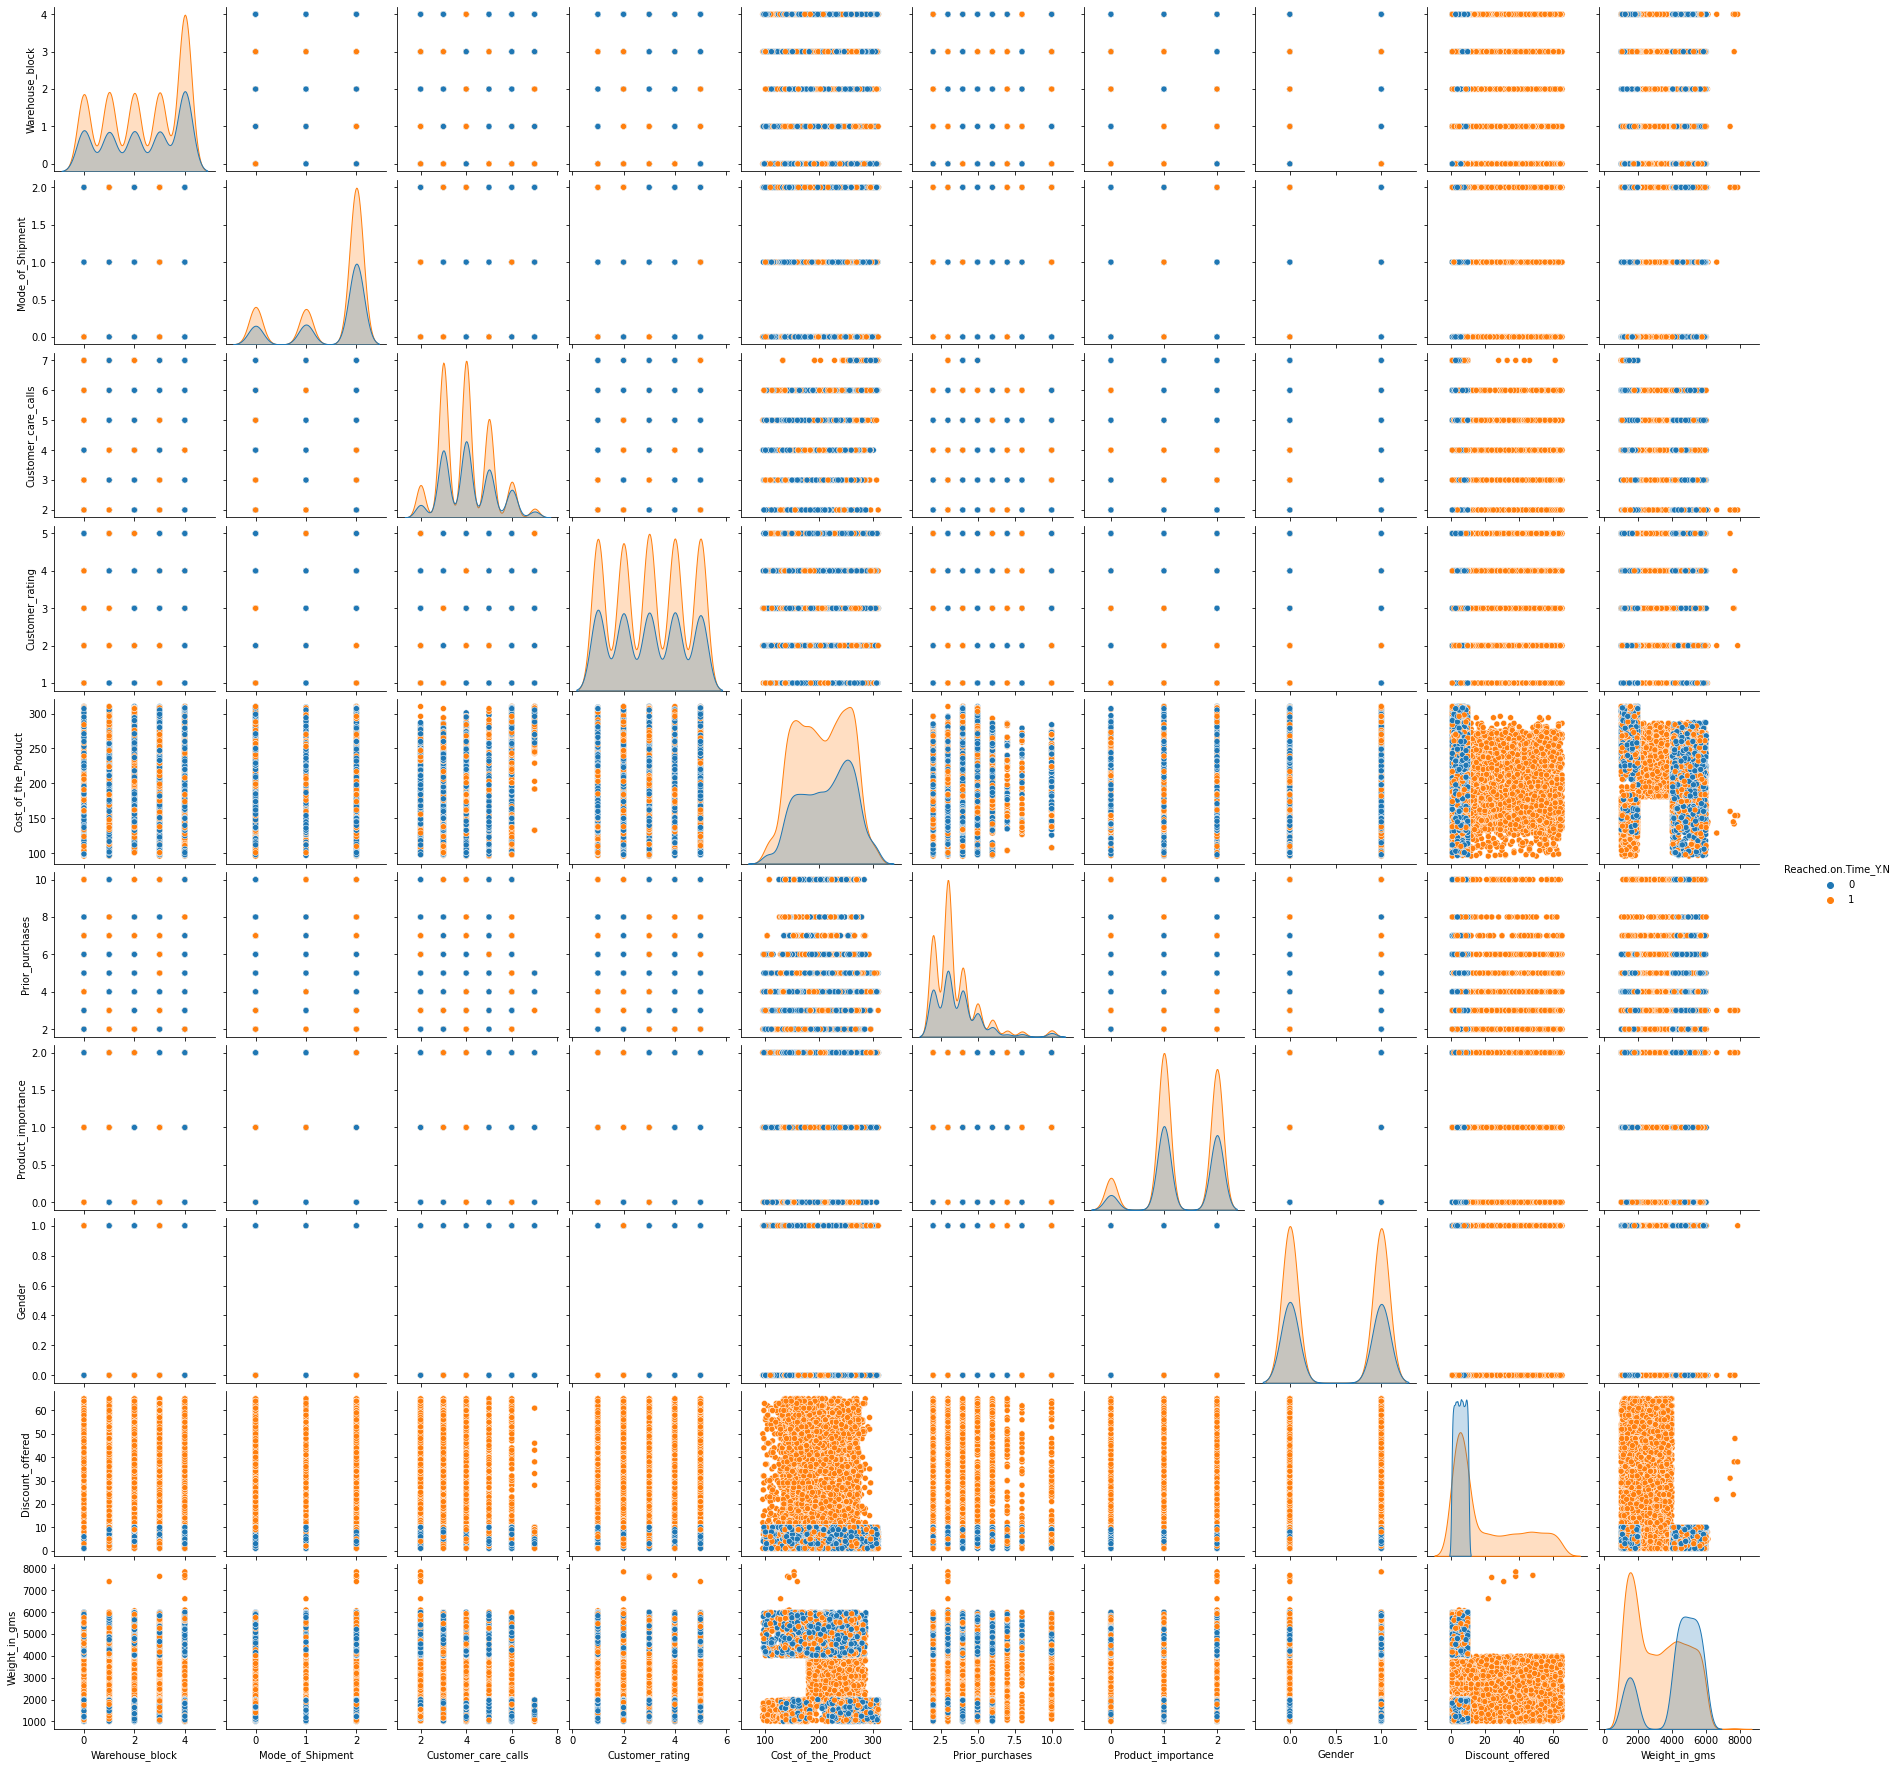

In [24]:
sns.pairplot(data_mod, hue="Reached.on.Time_Y.N")
plt.show()

Los atributos a elegir serán los de 'Discount_offered', 'Cost_of_the_Product' y 'Weight_in_gms' ya que como se nota en el pairplot, agrupan de forma casi determinante las etiquetas de Reached.on.Time_Y.N = 0

In [21]:
def plot_corre_heatmap(corr):
    '''
    Definimos una función para ayudarnos a graficar un heatmap de correlación
    '''
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    # Arreglamos un pequeño problema de visualización
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

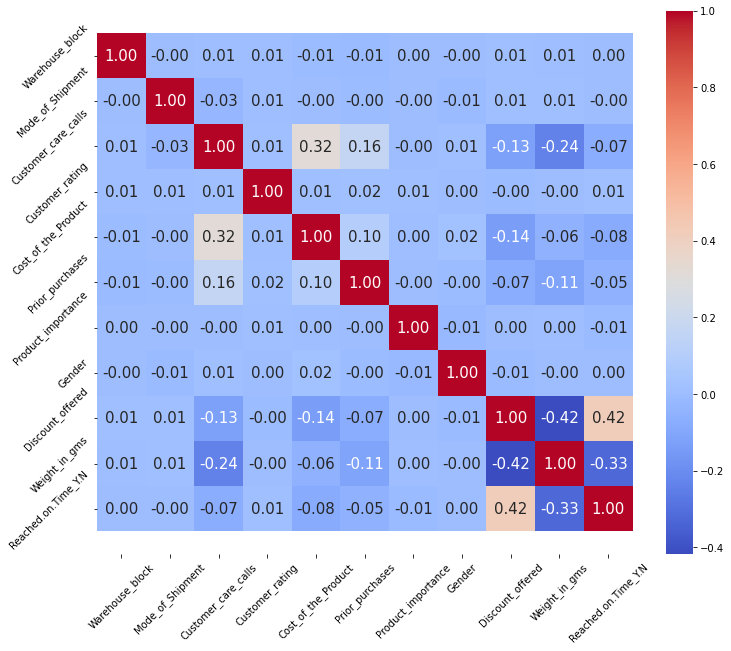

In [25]:
corr = data_mod.corr()
plot_corre_heatmap(corr)

# Separación de los datos para train y test

In [27]:
from sklearn.model_selection import train_test_split

In [75]:
X = np.vstack((data_mod['Cost_of_the_Product'],data_mod['Discount_offered'])).T
X.shape


(8999, 2)

In [36]:
y = data_mod['Reached.on.Time_Y.N']
y.shape


(8999,)

In [76]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(6299, 2) (6299,) (2700, 2) (2700,)


Intento # 1: Árbol de decisión

In [58]:
from sklearn.tree import DecisionTreeClassifier

# Instanciamos un objeto de la clase DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 3, random_state = 42) 

In [77]:
# Entrenamos el modelo

clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [78]:
# Exploramos algunas de las características del modelo entrenado.

print(clf.classes_)
print(clf.n_classes_)
print(clf.max_features_)
print(clf.feature_importances_)

[0 1]
2
2
[0.00822671 0.99177329]


In [79]:
# Predecimos

y_pred = clf.predict(X_test)

Evaluando...

In [80]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred))

0.6507407407407407


Fronteras de clasificación del modelo

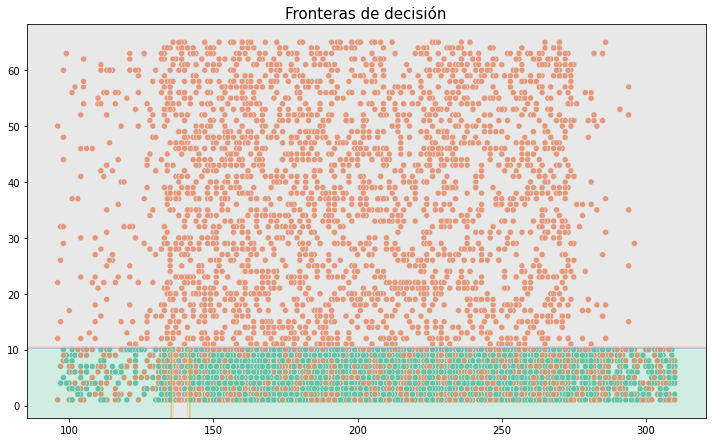

In [82]:
plt.figure(figsize= (10,6))


ax = sns.scatterplot(x = X[:,0], y = X[:,1], hue= y, palette='Set2')
plt.legend().remove()


xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

contours = ax.contourf(xx, yy, Z, alpha=0.3, cmap = 'Set2')
plt.tight_layout()
plt.title('Fronteras de decisión', fontsize= 15)
plt.show()

In [83]:
from sklearn.metrics import recall_score

precision = recall_score(y_test, y_pred, average= None)
print(precision)

[0.96716102 0.48063781]


Matriz de confusión

In [90]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred)

In [91]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(matrix)

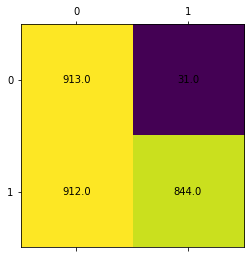

In [92]:
fig, ax = plt.subplots(figsize=(4,5))

ax.matshow(matrix)
for (i, j), z in np.ndenumerate(matrix):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plt.show()

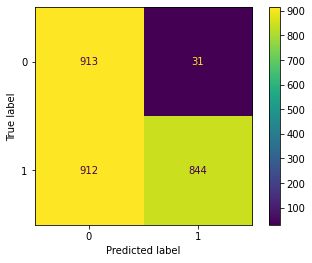

In [93]:
cm_display.plot()
plt.show()